<a href="https://colab.research.google.com/github/RbsFaneva/ML_exam_2025_ESIIA_5/blob/main/poketrafinday/notebooks/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("=== ANALYSE EXPLORATOIRE ===")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print("\nPremières lignes du train set:")
print(train_df.head())

=== ANALYSE EXPLORATOIRE ===
Train shape: (30000, 7)
Test shape: (10000, 6)

Premières lignes du train set:
                         transaction_id  step      type  amount customer_id  \
0  38d8cd1a-ab64-48a8-982b-547db096f8a5   421   PAYMENT  311000   C13646530   
1  2440928e-8a4c-4e74-a9c5-6329668be13d   325   PAYMENT  399600    C9452763   
2  973c2a3c-5676-477c-ac30-81334b01e90d   565   PAYMENT    7500   C31260354   
3  5413d0f4-b4f0-406f-bd91-91de1dce573c   511  TRANSFER   94000    C8841991   
4  c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98    63  CASH_OUT   15000    C3176716   

   age  is_fraud  
0   24         0  
1   25         0  
2   38         0  
3   26         0  
4   26         0  


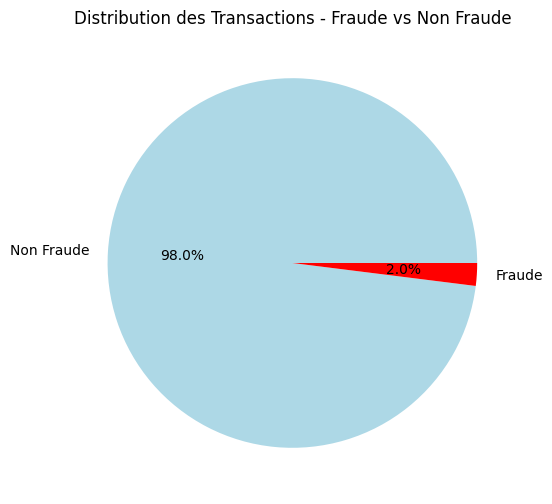

Nombre de fraudes: 595 (1.98%)
Déséquilibre important: Ratio de 49.4:1


In [7]:
# Distribution de la variable cible
plt.figure(figsize=(10, 6))
fraud_counts = train_df['is_fraud'].value_counts()
plt.pie(fraud_counts, labels=['Non Fraude', 'Fraude'], autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Distribution des Transactions - Fraude vs Non Fraude')
plt.show()

print(f"Nombre de fraudes: {fraud_counts[1]} ({fraud_counts[1]/len(train_df)*100:.2f}%)")
print(f"Déséquilibre important: Ratio de {fraud_counts[0]/fraud_counts[1]:.1f}:1")

In [8]:
# Analyse des données manquantes
print("\n=== DONNÉES MANQUANTES ===")
missing_data = train_df.isnull().sum()
print(missing_data[missing_data > 0])

# Types de données
print("\n=== TYPES DE DONNÉES ===")
print(train_df.dtypes)


=== DONNÉES MANQUANTES ===
Series([], dtype: int64)

=== TYPES DE DONNÉES ===
transaction_id    object
step               int64
type              object
amount             int64
customer_id       object
age                int64
is_fraud           int64
dtype: object


In [9]:
# Variables catégorielles
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("\n=== VARIABLES CATÉGORIELLES ===")
for col in categorical_cols:
    if col in train_df.columns:
        print(f"\n{col}:")
        print(train_df[col].value_counts())


=== VARIABLES CATÉGORIELLES ===

transaction_id:
transaction_id
6685f5ba-f030-4058-9e26-0aa4391b401e    1
7ec98f68-69c5-439d-a8fa-7860addc8246    1
48dbfd77-ae7a-4c2d-832f-cb843502a6db    1
ae0c7a3b-b5da-493c-93de-446d5489477a    1
e911b73c-68cb-485d-9250-a9292f907225    1
                                       ..
c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98    1
5413d0f4-b4f0-406f-bd91-91de1dce573c    1
973c2a3c-5676-477c-ac30-81334b01e90d    1
2440928e-8a4c-4e74-a9c5-6329668be13d    1
38d8cd1a-ab64-48a8-982b-547db096f8a5    1
Name: count, Length: 30000, dtype: int64

type:
type
PAYMENT     11150
TRANSFER     8160
CASH_OUT     7716
DEBIT        2974
Name: count, dtype: int64

customer_id:
customer_id
C9773232     2
C80242429    2
C91543472    2
C88129179    1
C66752963    1
            ..
C43802021    1
C13650056    1
C65308368    1
C36342391    1
C29368673    1
Name: count, Length: 29997, dtype: int64


BASELINE - REGRESSION LOGISTIQUE


=== TRAIN PROCESSED HEAD ===
   step  amount  age  is_fraud  type_DEBIT  type_PAYMENT  type_TRANSFER
0   421  311000   24         0           0             1              0
1   325  399600   25         0           0             1              0
2   565    7500   38         0           0             1              0
3   511   94000   26         0           0             0              1
4    63   15000   26         0           0             0              0

=== BASELINE - RÉGRESSION LOGISTIQUE ===
F1-Score Baseline: 0.1262

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85      5881
           1       0.07      0.96      0.13       119

    accuracy                           0.74      6000
   macro avg       0.53      0.85      0.49      6000
weighted avg       0.98      0.74      0.83      6000



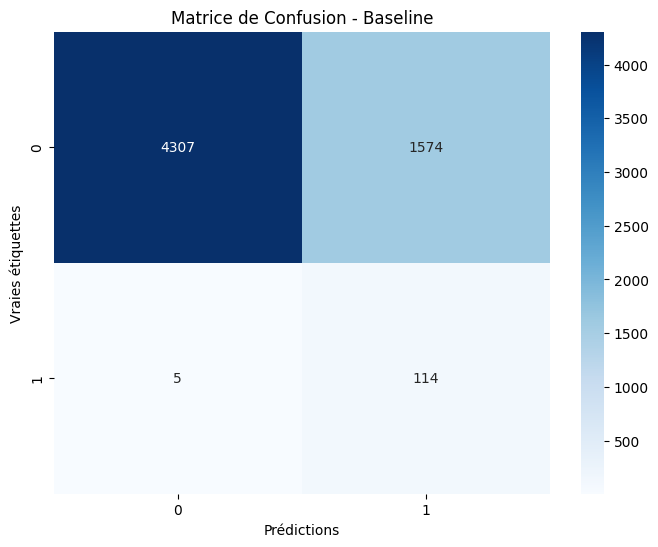

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Chargement des données (assuming train_df is already loaded)
# If train_df is not loaded, uncomment and run the following lines:
train_df = pd.read_csv('train.csv')

# --- Préparation des données pour le modèle (ADDED) ---
# Drop unnecessary columns
train_processed = train_df.drop(['transaction_id', 'customer_id'], axis=1)

# One-hot encode the 'type' column
train_processed = pd.get_dummies(train_processed, columns=['type'], drop_first=True)

# Convert boolean columns created by get_dummies to int
for col in train_processed.select_dtypes(include='bool').columns:
    train_processed[col] = train_processed[col].astype(int)

print("\n=== TRAIN PROCESSED HEAD ===")
print(train_processed.head())

# Préparation des données pour le modèle
X = train_processed.drop('is_fraud', axis=1)
y = train_processed['is_fraud']

# Split des données
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("\n=== BASELINE - RÉGRESSION LOGISTIQUE ===")

# Modèle de baseline
baseline_model = LogisticRegression(
    random_state=42,
    class_weight='balanced',  # Pour gérer le déséquilibre
    max_iter=1000
)

baseline_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_baseline = baseline_model.predict(X_val_scaled)
y_pred_proba_baseline = baseline_model.predict_proba(X_val_scaled)[:, 1]

# Évaluation
f1_baseline = f1_score(y_val, y_pred_baseline)
print(f"F1-Score Baseline: {f1_baseline:.4f}")

print("\nRapport de classification:")
print(classification_report(y_val, y_pred_baseline))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred_baseline)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - Baseline')
plt.ylabel('Vraies étiquettes')
plt.xlabel('Prédictions')
plt.show()

ce code :
-équilibres les données avec SMOTE.
-crée un modèle Random Forest capable de détecter les fraudes.
-entraînes le modèle sur les données équilibrées.
Et enfin évalues sa performance avec le F1-score et le rapport de classification pour t’assurer qu’il détecte correctement les fraudes.

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Application de SMOTE
print("\n=== APPLICATION DE SMOTE ===")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Distribution avant SMOTE: {np.bincount(y_train)}")
print(f"Distribution après SMOTE: {np.bincount(y_train_smote)}")


=== APPLICATION DE SMOTE ===
Distribution avant SMOTE: [23524   476]
Distribution après SMOTE: [23524 23524]


In [12]:
print("\n=== RANDOM FOREST ===")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_val_scaled)
f1_rf = f1_score(y_val, y_pred_rf)

print(f"F1-Score Random Forest: {f1_rf:.4f}")
print(classification_report(y_val, y_pred_rf))


=== RANDOM FOREST ===
F1-Score Random Forest: 0.3816
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5881
           1       0.26      0.70      0.38       119

    accuracy                           0.96      6000
   macro avg       0.63      0.83      0.68      6000
weighted avg       0.98      0.96      0.96      6000



**Partie 3 modele XGBOOST**

Ce code
* Il entraîne un **classificateur XGBoost** sur des données rééchantillonnées par SMOTE, en prenant des paramètres comme le nombre d’arbres (`n_estimators`), la profondeur, le taux d’apprentissage, etc.
* Il ajuste `scale_pos_weight` pour donner plus de poids à la classe “fraude” (positif) afin de gérer le déséquilibre des classes.
* Il évalue le modèle sur un jeu de validation en calculant le **F1-score** et affiche un rapport de classification.
* Il prépare une **recherche d’hyperparamètres** (GridSearch) sur quelques paramètres (learning_rate, profondeur, nombre d’arbres), mais la partie recherche est commentée pour gagner du temps.
* Il sélectionne ensuite le “meilleur modèle” : soit le modèle de base, soit celui issu du GridSearch.



In [13]:

print("\n=== XGBOOST ===")
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=len(y_train_smote[y_train_smote==0]) / len(y_train_smote[y_train_smote==1]),
    eval_metric='logloss',
    n_jobs=-1
)

xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_val_scaled)
f1_xgb = f1_score(y_val, y_pred_xgb)

print(f"F1-Score XGBoost: {f1_xgb:.4f}")
print(classification_report(y_val, y_pred_xgb))


=== XGBOOST ===
F1-Score XGBoost: 0.3840
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5881
           1       0.25      0.81      0.38       119

    accuracy                           0.95      6000
   macro avg       0.62      0.88      0.68      6000
weighted avg       0.98      0.95      0.96      6000



In [15]:
# Optimisation pour XGBoost (version simplifiée)
print("\n=== OPTIMISATION XGBOOST ===")
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

xgb_optim = XGBClassifier(
    random_state=42,
    scale_pos_weight=len(y_train_smote[y_train_smote==0]) / len(y_train_smote[y_train_smote==1]),
    n_jobs=-1
)

# GridSearch (commenté pour gagner du temps, à décommenter si nécessaire)
# grid_search = GridSearchCV(xgb_optim, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
# grid_search.fit(X_train_smote, y_train_smote)
# best_xgb = grid_search.best_estimator_
# print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Utilisation du meilleur modèle basé sur la validation
best_model = xgb_model  # ou best_xgb si GridSearch utilisé


=== OPTIMISATION XGBOOST ===
